#### Chatbot using LangGraph

In [2]:
import os

os.environ['GROQ_API_KEY'] = "Your_API_KEY"
groq_api_key = "Your_API_KEY"

In [3]:
from langchain_groq import ChatGroq

model = ChatGroq(model="qwen/qwen3-32b", groq_api_key=groq_api_key)
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x7f357d78cfa0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f357d78ceb0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
## Start building Chatbot using Chatgroq

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [6]:
class State(TypedDict):
    ## It appends the messages to the list, rather than overwriting
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)
graph_builder

In [7]:
def chatbot(state: State): ## Based on the state message, whatever the interactions happening, the state management will keep on changing
    return {"messages":model.invoke(state['messages'])}

In [8]:
graph_builder.add_node("chatbot", chatbot)
graph_builder

In [9]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [10]:
graph = graph_builder.compile()

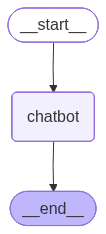

In [11]:
## To display the graph
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [12]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", 'q']:
        print("Good Bye!! Have a nice day!!")
        break
    for event in graph.stream({'messages': ("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant: ', value['messages'].content)

dict_values([{'messages': AIMessage(content='<think>\nOkay, the user said "Hello". I should respond in a friendly and welcoming way. Let me make sure to keep it open-ended so they feel comfortable to ask anything. Maybe add an emoji to keep it approachable. Let me check the tone—should be positive and helpful. Alright, that should work.\n</think>\n\nHi there! 😊 How can I assist you today? Whether you have a question, need help with something specific, or just want to chat, I\'m here for you!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 9, 'total_tokens': 113, 'completion_time': 0.209746516, 'completion_tokens_details': None, 'prompt_time': 0.000268426, 'prompt_tokens_details': None, 'queue_time': 0.052587954, 'total_time': 0.210014942}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bff10-c476-